In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2

# ----------------------------
# 1. DEVICE CONFIGURATION
# ----------------------------
# 1. CONFIGURAZIONE DISPOSITIVO
# ----------------------------

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# ----------------------------
# 2. DATA LOADING & TRANSFORMS
# ----------------------------
# 2. CARICAMENTO E TRASFORMAZIONE DEI DATI
# ----------------------------


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# ----------------------------
# 3. DEFINE THE CNN MODEL
# ----------------------------
# 3. DEFINISCI LA RETE NEURALE CONVOLUZIONALE
# ----------------------------


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # (28 x 28) -> (28 x 28)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # (28 x 28) -> (28 x 28)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                   # (28 x 28) -> (14 x 14)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for digits 0-9

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

# Initialize the model
model = CNN().to(device)

In [ ]:
print('Dataset sample : ', train_dataset[0])
print('Shape ', train_dataset[0][0].shape)
print('Shape ', train_dataset[0][1])



Dataset sample :  (tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -

(1, 28, 28)
(28, 28, 1)


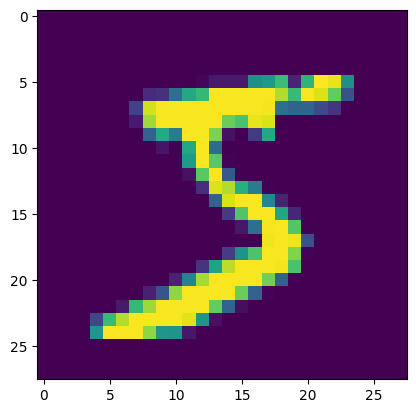

In [ ]:
import numpy as np
# Convert the tensor to a numpy array
numpy_image = train_dataset[0][0].numpy()
print(numpy_image.shape)
# Convert the numpy array to a cv2 image
cv2_image = np.transpose(numpy_image, (1,2, 0))
print(cv2_image.shape)

# Display the image using cv2
plt.imshow(cv2_image)

# ----------------------------
# 4. DEFINE LOSS AND OPTIMIZER
# ----------------------------
# 4. DEFINISCI FUNZIONE DI COSTO E OTTIMIZZATORE
# ----------------------------

In [ ]:
criterion = 'Choose loss function'
optimizer = 'Choose optimizer'


SyntaxError: invalid syntax (1483390135.py, line 1)

# ----------------------------
# 5. TRAINING LOOP
# ----------------------------
# 5. CICLO DI ALLENAMENTO
# ----------------------------


In [ ]:
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    pass


Epoch [1/5], Loss: 0.1284
Epoch [2/5], Loss: 0.0380
Epoch [3/5], Loss: 0.0232
Epoch [4/5], Loss: 0.0167
Epoch [5/5], Loss: 0.0104


# ----------------------------
# 6. EVALUATION
# ----------------------------
# 6. VALUTAZIONE
# ----------------------------


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        pass


Test Accuracy: 99.08%


# ----------------------------
# 7. VISUALIZE TRAINING LOSS
# ----------------------------
# 7. VISUALIZZA LA FUNZIONE DI PERDITA DURANTE L'ALLENAMENTO
# ----------------------------


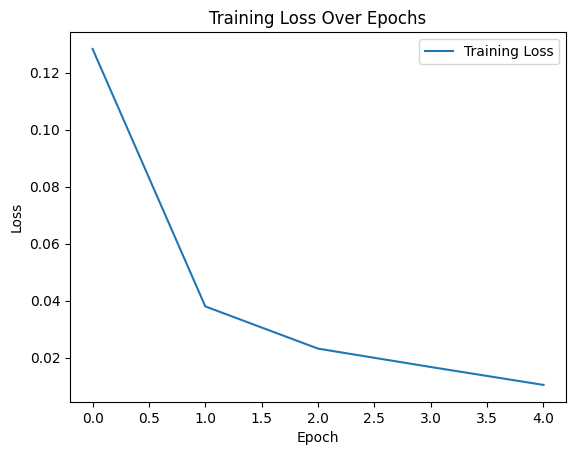

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ----------------------------
# 8. TEST EXAMPLES
# ----------------------------
# 8. ESEMPI DI TEST
# ----------------------------

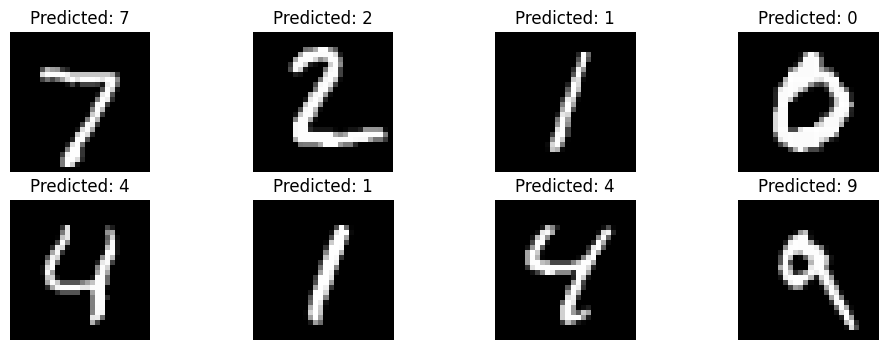

In [ ]:
import numpy as np

model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot some test images with predictions
plt.figure(figsize=(12, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted[i].item()}")
    plt.axis('off')
plt.show()